FileNotFoundError: [Errno 2] No such file or directory: 'E:\\AI\\results\\baseline\\KDD\\draw\\KDD\\draw\\bar\\dos_dl_model_comparison_bar.png'

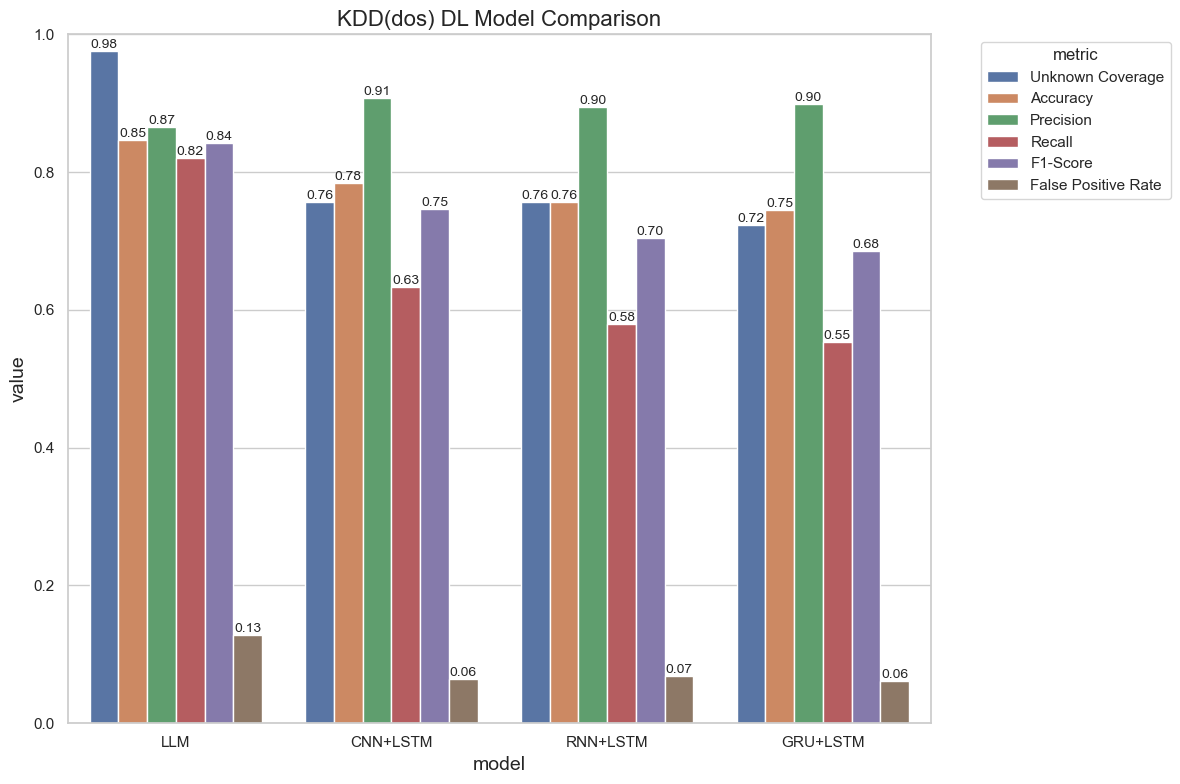

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

def plot_model_comparison(models, metrics, values, title="Model Performance Comparison", figsize=(12, 8), save_path=None):
    """
    绘制不同模型各项指标的对比图
    
    参数:
    models: list, 模型名称列表
    metrics: list, 评估指标名称列表
    values: list of lists, 每个模型对应的各项指标值
    title: str, 图表标题
    figsize: tuple, 图表大小
    save_path: str, 保存路径，如果为None则不保存

    """
    # 创建DataFrame以便使用seaborn
    data = []
    for i, model in enumerate(models):
        for j, metric in enumerate(metrics):
            data.append({
                'model': model,
                'metric': metric,
                'value': values[i][j]
            })
    df = pd.DataFrame(data)
    
    # 设置样式
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)
    
    # 绘制条形图
    ax = sns.barplot(x='model', y='value', hue='metric', data=df)
    
    # 添加标题和标签
    plt.title(title, fontsize=16)
    plt.xlabel('model', fontsize=14)
    plt.ylabel('value', fontsize=14)
    plt.ylim(0, 1.0)  # 假设指标值在0-1之间
    
    # 在条形上方添加数值标签
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', fontsize=10)
    
    # 调整图例位置
    plt.legend(title='metric', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    
    # 保存图表
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # plt.show()

def plot_model_comparison_radar(models, metrics, values, title="model performance radar chart", figsize=(10, 8), save_path=None):
    """
    绘制不同模型各项指标的雷达图对比
    
    参数:
    models: list, 模型名称列表
    metrics: list, 评估指标名称列表
    values: list of lists, 每个模型对应的各项指标值
    title: str, 图表标题
    figsize: tuple, 图表大小
    save_path: str, 保存路径，如果为None则不保存
    """
    # 设置图表
    plt.figure(figsize=figsize)
    
    # 计算雷达图的角度
    angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
    angles += angles[:1]  # 闭合雷达图
    
    # 设置极坐标图
    ax = plt.subplot(111, polar=True)
    
    # 添加每个模型的数据
    for i, model in enumerate(models):
        values_model = values[i]
        values_model += values_model[:1]  # 闭合雷达图
        ax.plot(angles, values_model, 'o-', linewidth=2, label=model)
        ax.fill(angles, values_model, alpha=0.1)
    
    # 设置刻度标签
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    
    # 设置y轴范围
    ax.set_ylim(0, 1)
    
    # 添加图例和标题
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title(title, fontsize=16)
    
    plt.tight_layout()
    
    # 保存图表
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # plt.show()

def plot_model_comparison_heatmap(models, metrics, values, title="model performance heatmap", figsize=(10, 8), save_path=None):
    """
    绘制不同模型各项指标的热力图对比
    
    参数:
    models: list, 模型名称列表
    metrics: list, 评估指标名称列表
    values: list of lists, 每个模型对应的各项指标值
    title: str, 图表标题
    figsize: tuple, 图表大小
    save_path: str, 保存路径，如果为None则不保存
    """
    # 创建数据矩阵
    data_matrix = np.array(values)
    
    # 设置图表
    plt.figure(figsize=figsize)
    
    # 绘制热力图
    ax = sns.heatmap(data_matrix, annot=True, fmt=".2f", cmap="YlGnBu",
                     xticklabels=metrics, yticklabels=models, vmin=0, vmax=1)
    
    # 添加标题和标签
    plt.title(title, fontsize=16)
    plt.tight_layout()
    
    # 保存图表
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # plt.show()


# DL模型数据
dl_models = ['LLM', 'CNN+LSTM', 'RNN+LSTM', 'GRU+LSTM']
dl_values_dos = [
    [0.9761, 0.8461, 0.8653, 0.8198, 0.8419, 0.1276],  # LLM的各项指标
    [0.7569, 0.7843, 0.9079, 0.6328, 0.7458, 0.0642],  # CNN+LSTM的各项指标
    [0.7565, 0.7560, 0.8951, 0.5800, 0.7039, 0.0680],  # RNN+LSTM的各项指标
    [0.7234, 0.7455, 0.8992, 0.5530, 0.6848, 0.0620]   # GRU+LSTM的各项指标
]
dl_values_probe = [
    [0.9401, 0.8507, 0.8683, 0.8268, 0.8470, 0.1254],  # LLM的各项指标
    [0.5171, 0.7543, 0.8948, 0.5764, 0.7011, 0.0678],  # CNN+LSTM的各项指标
    [0.4287, 0.7547, 0.9725, 0.5242, 0.6812, 0.0148],  # RNN+LSTM的各项指标
    [0.4197, 0.7527, 0.9748, 0.5188, 0.6772, 0.0134]   # GRU+LSTM的各项指标
]
dl_values_r2l = [
    [0.8237, 0.8235, 0.7707, 0.9210, 0.8392, 0.2740],  # LLM的各项指标
    [0.2515, 0.7921, 0.8881, 0.6684, 0.7628, 0.0842],  # CNN+LSTM的各项指标
    [0.1167, 0.7638, 0.9009, 0.5928, 0.7151, 0.0652],  # RNN+LSTM的各项指标
    [0.0599, 0.7783, 0.9000, 0.6262, 0.7385, 0.0696]   # GRU+LSTM的各项指标
]
dl_values_u2r = [
    [1.0000, 0.8563, 0.8651, 0.8442, 0.8545, 0.1316],  # LLM的各项指标
    [0.6567, 0.7841, 0.8725, 0.6654, 0.7550, 0.0972],  # CNN+LSTM的各项指标
    [0.7463, 0.7703, 0.8967, 0.6110, 0.7268, 0.0704],  # RNN+LSTM的各项指标
    [0.8507, 0.7658, 0.8960, 0.6014, 0.7197, 0.0698]   # GRU+LSTM的各项指标
]


# ML模型数据
ml_models = ['LLM','SVM', 'Random Forest', 'Decision Tree', 'Logistic Regression', 'XGBoost']
ml_values_dos = [
    [0.9761, 0.8461, 0.8653, 0.8198, 0.8419, 0.1276],  # LLM的各项指标
    [0.7018, 0.7531, 0.9699, 0.5224, 0.6791, 0.0162],  # SVM的各项指标
    [0.5496, 0.7988, 0.9603, 0.6234, 0.7560, 0.0258],  # Random Forest的各项指标
    [0.6771, 0.8165, 0.8593, 0.7570, 0.8049, 0.1240],  # Decision Tree的各项指标
    [0.6146, 0.7273, 0.9687, 0.4698, 0.6327, 0.0152],  # Logistic Regression的各项指标
    [0.5471, 0.8078, 0.9777, 0.6300, 0.7662, 0.0144]   # XGBoost的各项指标
]
ml_values_probe = [
    [0.9401, 0.8507, 0.8683, 0.8268, 0.8470, 0.1254],  # LLM的各项指标
    [0.4762, 0.7560, 0.9867, 0.5190, 0.6802, 0.0070],  # SVM的各项指标
    [0.5217, 0.7241, 0.9718, 0.4616, 0.6259, 0.0134],  # Random Forest的各项指标
    [0.3986, 0.2370, 0.3192, 0.4642, 0.3783, 0.9902],  # Decision Tree的各项指标
    [0.4011, 0.7440, 0.9849, 0.4956, 0.6594, 0.0076],  # Logistic Regression的各项指标
    [0.4924, 0.2534, 0.3342, 0.4970, 0.3996, 0.9902]   # XGBoost的各项指标
]
ml_values_r2l = [
    [0.8237, 0.8235, 0.7707, 0.9210, 0.8392, 0.2740],  # LLM的各项指标
    [0.0513, 0.7919, 0.9600, 0.6092, 0.7454, 0.0254],  # SVM的各项指标
    [0.7510, 0.7684, 0.9391, 0.5740, 0.7125, 0.0372],  # Random Forest的各项指标
    [0.8348, 0.8908, 0.9686, 0.8078, 0.8809, 0.0262],  # Decision Tree的各项指标
    [0.0094, 0.7569, 0.8990, 0.5788, 0.7042, 0.0650],  # Logistic Regression的各项指标
    [0.8039, 0.8275, 0.9527, 0.6892, 0.7998, 0.0342]   # XGBoost的各项指标
]
ml_values_u2r = [
    [1.0000, 0.8563, 0.8651, 0.8442, 0.8545, 0.1316],  # LLM的各项指标
    [0.7313, 0.7903, 0.9604, 0.6056, 0.7428, 0.0250],  # SVM的各项指标
    [1.0000, 0.8549, 0.9457, 0.7530, 0.8384, 0.0432],  # Random Forest的各项指标
    [0.9701, 0.8771, 0.9632, 0.7842, 0.8645, 0.0300],  # Decision Tree的各项指标
    [0.9104, 0.7723, 0.9368, 0.5840, 0.7195, 0.0394],  # Logistic Regression的各项指标
    [1.0000, 0.8327, 0.9302, 0.7194, 0.8113, 0.0540]   # XGBoost的各项指标
]

# AIS模型数据
als_model = ['LLM','V-Detector', 'DGA-PSO', 'MDGWO-NSA']
als_values_dos = [
    [0.9761, 0.8461, 0.8653, 0.8198, 0.8419, 0.1276],  # LLM的各项指标
    [0.6714, 0.7478, 0.9832, 0.5042, 0.6666, 0.0086],  # V-Detector的各项指标 
    [0.8974, 0.8457, 0.9426, 0.7362, 0.8267, 0.0448],  # DGA-PSO的各项指标
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # MDGWO-NSA的各项指标
]
als_values_probe = [
    [0.9401, 0.8507, 0.8683, 0.8268, 0.8470, 0.1254],  # LLM的各项指标
    [0.7542, 0.8022, 0.9815, 0.6160, 0.7569, 0.0116],  # V-Detector的各项指标
    [0.8604, 0.8275, 0.9389, 0.7006, 0.8024, 0.0456],  # DGA-PSO的各项指标
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # MDGWO-NSA的各项指标
]
als_values_r2l = [
    [0.8237, 0.8235, 0.7707, 0.9210, 0.8392, 0.2740],  # LLM的各项指标
    [0.1832, 0.7903, 0.9440, 0.6172, 0.7464, 0.0366],  # V-Detector的各项指标
    [0.2795, 0.8478, 0.9403, 0.7428, 0.8299, 0.0472],  # DGA-PSO的各项指标
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # MDGWO-NSA的各项指标
]
als_values_u2r = [
    [1.0000, 0.8563, 0.8651, 0.8442, 0.8545, 0.1316],  # LLM的各项指标
    [0.6418, 0.7243, 0.9934, 0.4516, 0.6209, 0.0030],  # V-Detector的各项指标
    [1.0000, 0.8446, 0.9037, 0.7714, 0.8323, 0.0822],  # DGA-PSO的各项指标
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # MDGWO-NSA的各项指标
]


metrics = ['Unknown Coverage', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'False Positive Rate']

def plot_all_models(unknown_type):

    if unknown_type == 'dos':
        dl_values = dl_values_dos
        ml_values = ml_values_dos
        als_values = als_values_dos
    elif unknown_type == 'probe':
        dl_values = dl_values_probe
        ml_values = ml_values_probe
        als_values = als_values_probe
    elif unknown_type == 'r2l':
        dl_values = dl_values_r2l
        ml_values = ml_values_r2l
        als_values = als_values_r2l
    elif unknown_type == 'u2r':
        dl_values = dl_values_u2r
        ml_values = ml_values_u2r
        als_values = als_values_u2r
        
    # DL模型    
    plot_model_comparison(dl_models, metrics, dl_values, 
        title=f"KDD({unknown_type}) DL Model Comparison", 
        save_path=f"bar/{unknown_type}_dl_model_comparison_bar.png")
    plot_model_comparison_radar(dl_models, metrics, dl_values,
        title=f"KDD({unknown_type}) DL Model Comparison Radar",
        save_path=f"radar/{unknown_type}_dl_model_comparison_radar.png")
    plot_model_comparison_heatmap(dl_models, metrics, dl_values,
        title=f"KDD({unknown_type}) DL Model Comparison Heatmap",
        save_path=f"heatmap/{unknown_type}_dl_model_comparison_heatmap.png")
    # ML模型
    plot_model_comparison(ml_models, metrics, ml_values,
        title=f"KDD({unknown_type}) ML Model Comparison",
        save_path=f"bar/{unknown_type}_ml_model_comparison_bar.png")
    plot_model_comparison_radar(ml_models, metrics, ml_values,
        title=f"KDD({unknown_type}) ML Model Comparison Radar",
        save_path=f"radar/{unknown_type}_ml_model_comparison_radar.png")
    plot_model_comparison_heatmap(ml_models, metrics, ml_values,
        title=f"KDD({unknown_type}) ML Model Comparison Heatmap",
        save_path=f"heatmap/{unknown_type}_ml_model_comparison_heatmap.png")
    # AIS模型    
    plot_model_comparison(als_model, metrics, als_values,
        title=f"KDD({unknown_type}) AIS Model Comparison",
        save_path=f"bar/{unknown_type}_ais_model_comparison_bar.png")
    plot_model_comparison_radar(als_model, metrics, als_values,
        title=f"KDD({unknown_type}) AIS Model Comparison Radar",
        save_path=f"radar/{unknown_type}_ais_model_comparison_radar.png")
    plot_model_comparison_heatmap(als_model, metrics, als_values,
        title=f"KDD({unknown_type}) AIS Model Comparison Heatmap",
        save_path=f"heatmap/{unknown_type}_ais_model_comparison_heatmap.png")


plot_all_models('dos')
plot_all_models('probe')
plot_all_models('r2l')
plot_all_models('u2r')

